In [4]:
import numpy as np
np.__version__


'1.26.4'

In [5]:
#!pip install -Uqq fastai
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.utils import download_images, resize_images
from fastai.vision.all import *

In [6]:
!pip install -Uqq ddgs
from ddgs import DDGS

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.8 MB/s eta 0:00:00:00:01


In [7]:
from pathlib import Path
import time

categories = ['Arachnida', 'Crustacea', 'Insecta', 'Chilopoda', 'Diplopoda']

path = Path('Arthropods')

if not path.exists():
    path.mkdir()
    for cat in categories:
        dest = (path/cat)
        dest.mkdir(exist_ok=True)
        results = search_images(f"{cat}", max_images=200)
        download_images(dest, urls=results)
        time.sleep(10)

In [8]:
fns = get_image_files(path)
#fns
failed = verify_images(fns)
#failed
failed.map(Path.unlink)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


(#12) [None,None,None,None,None,None,None,None,None,None,None,None]

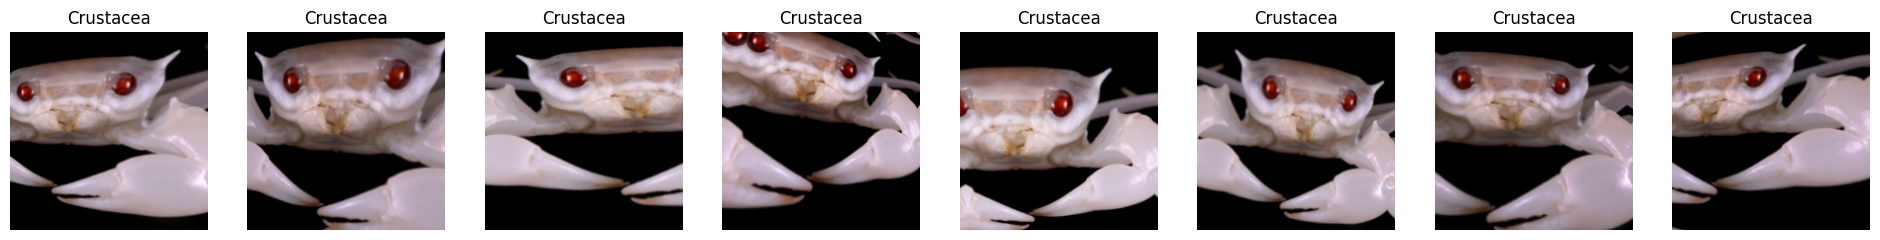

In [9]:
Artho = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

Artho = Artho.new(item_tfms=RandomResizedCrop(200, min_scale=0.5), batch_tfms=aug_transforms())
dls = Artho.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [10]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 167MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.351999,1.049684,0.309524,02:47


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.814837,0.773811,0.226190,03:14
1,0.685342,0.738525,0.214286,02:39
2,0.556966,0.771832,0.214286,02:15
3,0.459601,0.804390,0.214286,02:29
4,0.391942,0.833068,0.202381,02:14
5,0.345434,0.853039,0.190476,02:12


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

In [12]:
import timm
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [14]:
learn = vision_learner(dls, 'convnext_small', metrics=error_rate).to_fp16()
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.082779,0.488507,0.154762,02:02


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.517497,0.362354,0.107143,03:06
1,0.428759,0.318005,0.083333,02:43
2,0.344541,0.329395,0.071429,02:42
3,0.283885,0.333036,0.071429,02:50


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
learn = vision_learner(dls, 'convnext_base', metrics=error_rate).to_fp16()
learn.fine_tune(4)

model.safetensors:   0%|          | 0.00/354M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.063853,0.507561,0.083333,05:28


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.280459,0.440503,0.083333,04:33
1,0.256631,0.475115,0.095238,04:21
2,0.195871,0.424691,0.095238,06:41
3,0.181936,0.424151,0.071429,05:26


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
